# Introduction
---
The Titanic disaster of 1912 remains one of the most infamous maritime tragedies in history. Analyzing the factors that influenced passenger survival can provide valuable insights into decision-making processes and safety protocols. This project aims to develop predictive models to determine the likelihood of survival for passengers aboard the Titanic. By leveraging historical data and employing machine learning techniques, we seek to uncover patterns and relationships that contributed to survival rates, ultimately enhancing our understanding of this historic event.


The project follows these key steps:
- **Importing Libraries**: Essential libraries for data manipulation, visualization, and model building.
- **Data Loading**: Loading the dataset for analysis.
- **Data Visualization**: Exploring and understanding data patterns.
- **Data Preprocessing**: Handled **Missing values** and **Encoding Categorical Columns**
- **Feature-Label Split**: Separating features from labels.
- **Train-Test Split**: Dividing the data into training and testing sets.
- **Training Models**: **Logistic regression**
- **Model Evaluation**: Using **Accuracy score**

# Importing Libraries:
---

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Loading: 
---


In [16]:
#Loading the .csv file:
titanic = pd.read_csv('titanic.csv')

# Visualising the Dataset:
---

**1. Visualising the first 5 examples of the data:**

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**2. Finding the size of the dataset:**

In [18]:
titanic.shape

(418, 12)

**3. Getting more information about the data:**

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**4. Analysing the number of people survived using a count_plot:**

In [31]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

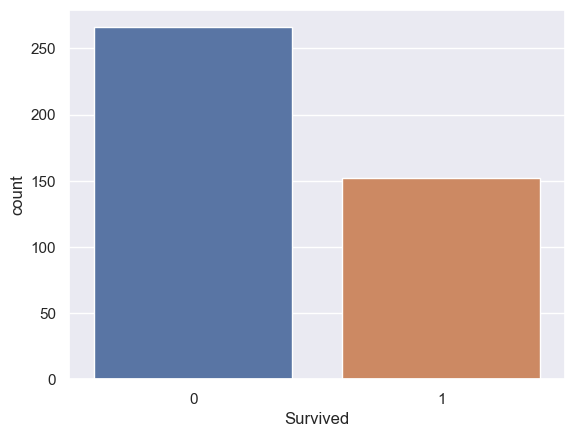

In [36]:
sns.countplot(x='Survived',data=titanic)

We can conclude with this plot that, There are more number of poeple who did not survived.

---
**5. Visualising the number of males and females which there on the titanic dataset:**

In [37]:
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

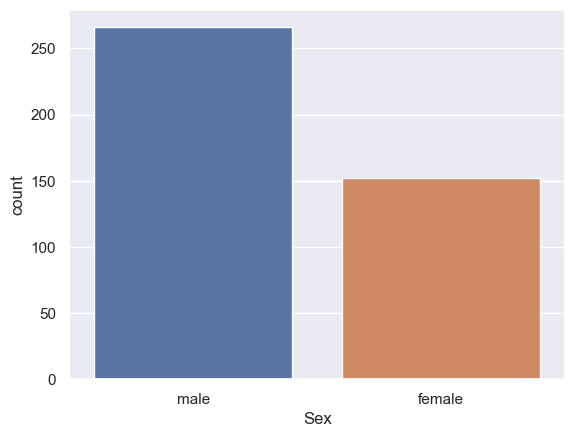

In [39]:
#Observing through a count_plot:
sns.countplot(x='Sex',data=titanic)

we can conclude that there are more males than females on the ship

**6. Visualising the number of people of different ticket_type:**`

<Axes: xlabel='Pclass', ylabel='count'>

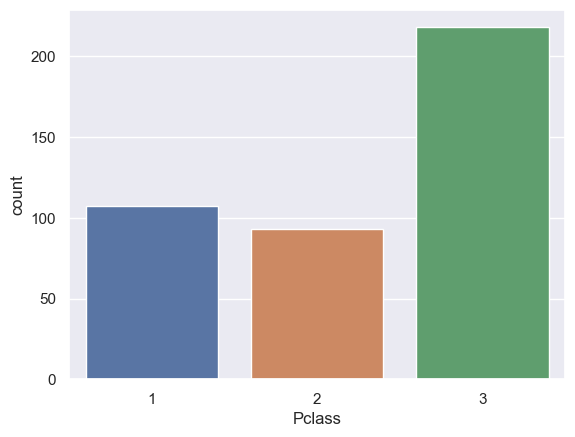

In [47]:
sns.countplot(x='Pclass',data=titanic)

we can conclude that there are: highest number of class-3 people, then class-1 and then class-2

**7. Visualising the survival rate based on the ticket_type:**

<Axes: xlabel='Pclass', ylabel='count'>

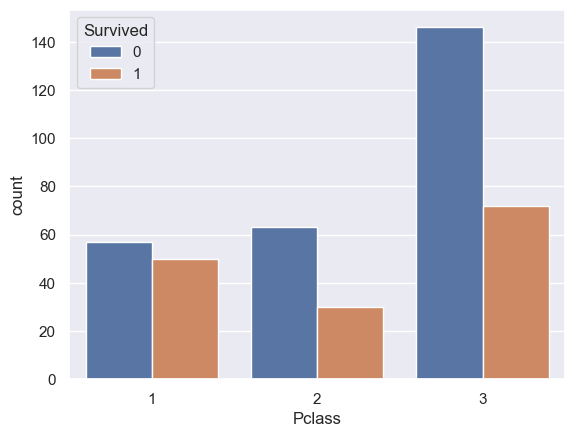

In [46]:
sns.countplot(x='Pclass',hue='Survived',data=titanic)

# Data Preprocessing:
---

### **1. Checking for missing values in the dataset:**


In [28]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We have column-wise missing values.
There are only two columns which contains missing values.

### **2. Handling missing values:**

As we have total 418 columns and **Cabin** feature has 327 values as NULL, which indicates the feature is mostly Empty.

**Dropping the 'Cabin' feature:**

In [21]:
titanic = titanic.drop(columns = 'Cabin', axis=1)    #axis = 1: as column is dropped.

**Impute_mean method is used to handle the missing_values of 'Age' feature:** Filling the mean of rest of column to the missing_value columns

In [23]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

**Impute_mean method is used to handle the missing_values of 'Fare' feature:** Filling the mean of rest of column to the missing_value columns

In [27]:
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)

### 3. Encoding the categorical features

There are two catgorical features: 
1. Sex
2. Embarked


Obtaining the different class values of feature - 'Sex':


In [48]:
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

Obtaining the different class values of feature - 'Embarked':

In [49]:
titanic['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

Converting the Categorical Columns into meaningful numerical values:

In [54]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

# Feature Target Split:
- X: Contains meaningful features only. 'Name','PassengerId','Ticket' must be dropped , as they are not meaningful in predicting survivals. 
- Y :Contains Target label : 'Survived'.

In [55]:
X = titanic.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic['Survived']`

Printing the feature_set: Contains only numerical columns.

In [58]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


Printing the target labels: 

In [59]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# Train/Test Split

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=5)

Checking the size of training and testing data:

In [61]:
print(X_train.shape,X_test.shape)

(313, 7) (105, 7)


# Model Training: Logistic Regression

**1. Obtaining the model:**


In [64]:
model = LogisticRegression()

**2. Training the model on the training data:**

In [66]:
model.fit(X_train,Y_train)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation:

### 1. Using accuracy_score:

- Finding Accuracy on training and testing data:


In [71]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_accuracy = accuracy_score(Y_train,X_train_prediction)
testing_accuracy = accuracy_score(Y_test,X_test_prediction)
print('training accuracy =', training_accuracy)
print('Testing accuracy = ',testing_accuracy)

training accuracy = 1.0
Testing accuracy =  1.0


# Conclusion: 
In this project, we implemented a **Logistic Regression** model to predict Titanic passenger survival. The model achieved an **accuracy of 1** on both the training and testing datasets. This perfect accuracy is likely **due to the small dataset size of only 418 examples**. While the results are promising, further evaluation with larger and more diverse datasets is necessary to validate the model's robustness and generalizability.